## Homework - Machine Learning Preparation



Kelompok 1--Data Center
- Khalid Destiawan (captain)
- Sherlyna Anugerah Putri
- Aditya Muhammad Hafiz Charnita
- Rika Elisabeth
- Mochammad Bagus Prasetya
- Harianto
- Qomaruzzaman
- Ilyas HY


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction

/content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
df = pd.read_csv("Product_Exclusive_Classification.csv")
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

# 1. Descriptive Statistics




Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:<br>
<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?<br><br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br><br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)<br><br>
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
misal untuk A: “Semua tipe data sudah sesuai”

In [ ]:
df.sample(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
3600,1985779,CLEAN RESERVE,Rollerballs & Travel Size,5.0,43.0,2700.0,28.0,28.0,0
6524,2210680,The Ordinary,Face Serums,4.0,70.0,24400.0,7.9,7.9,0
4499,2066207,SEPHORA COLLECTION,Lipstick,4.0,207.0,29700.0,14.0,14.0,1
4869,2098713,Marc Jacobs Beauty,Eye Brushes,5.0,10.0,4400.0,30.0,30.0,0
4303,2049237,BVLGARI,Perfume,3.5,21.0,1700.0,86.0,86.0,0


In [ ]:
# A. Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [ ]:
#kelompokan sesuai jenis kolom
cate = ['brand', 'category']
numb = ['id','rating','number_of_reviews','love','price','value_price','exclusive']

In [ ]:
df[numb].describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [ ]:
df[cate].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


**Jawaban Soal 1**<br>

A. Semua tipe data sudah sesuai<br>
B. kolom category, rating, number_of_reviews, love, price, value_price memiliki data kosong<br>
C. Pada kolom number_of_reviews nilai mean 303.57 dan median 56 terpaut jauh berarti terdapat outlier yang sangat besar


C. Kolom Summary:
kolom rating terlihat normal<br>
Kolom number_of_reviews ada indikasi outlier atau skewed distribution (positively skewed)<br>
Kolom love ada indikasi outlier atau skewed distribution (positively skewed)<br>
Kolom price ada indikasi outlier atau skewed distribution (positively skewed)<br>
Kolom value_price ada indikasi outlier atau skewed distribution (positively skewed)

# Exploratory Data Analysis (EDA)

### 2. Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

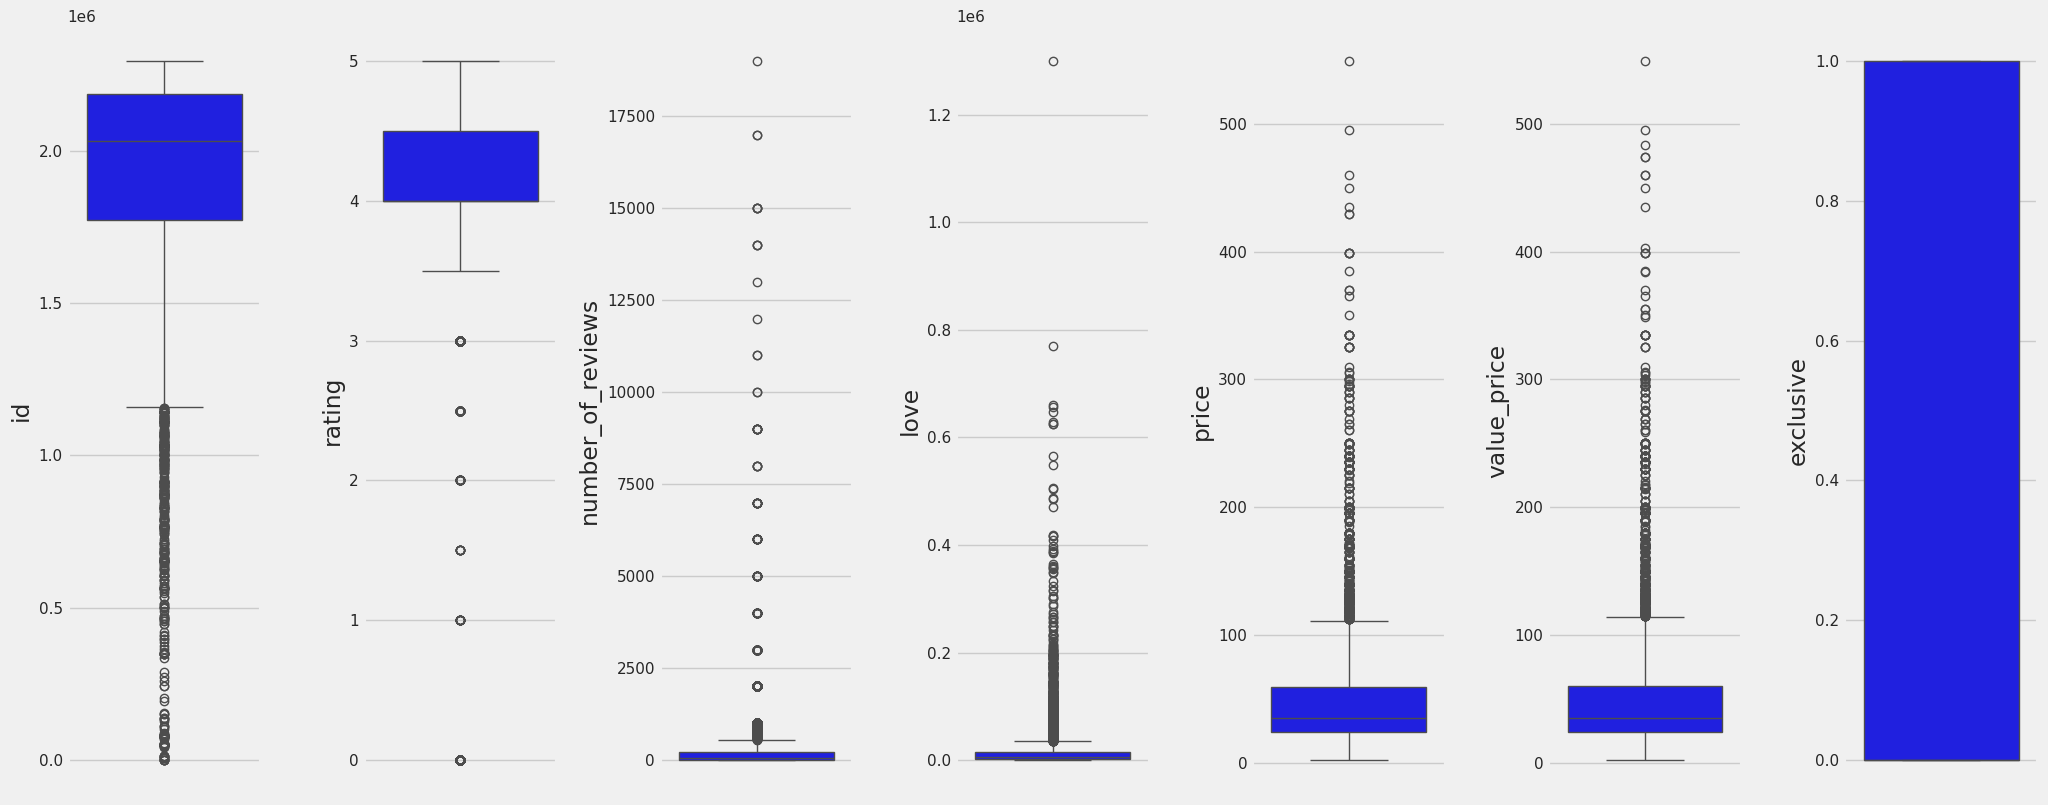

In [ ]:
# boxplot untuk feature numerik
for i in range(0, len(numb)):
    plt.subplot(1, len(numb), i+1)
    sns.boxplot(y=df[numb[i]], color='blue', orient='v')
    plt.tight_layout()

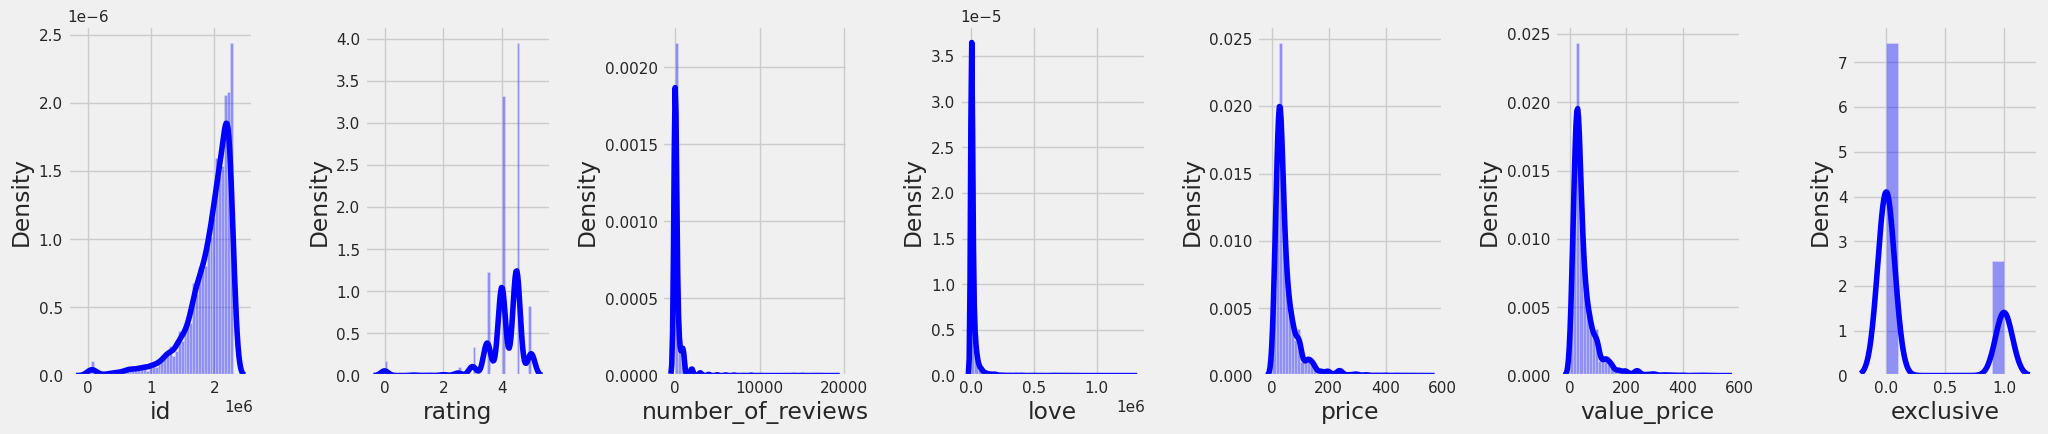

In [ ]:
# distribusi untuk feature numerik
for i in range(0, len(numb)):
    plt.subplot(2, len(numb), i+1)
    sns.distplot(df[numb[i]], color='blue')
    plt.tight_layout()

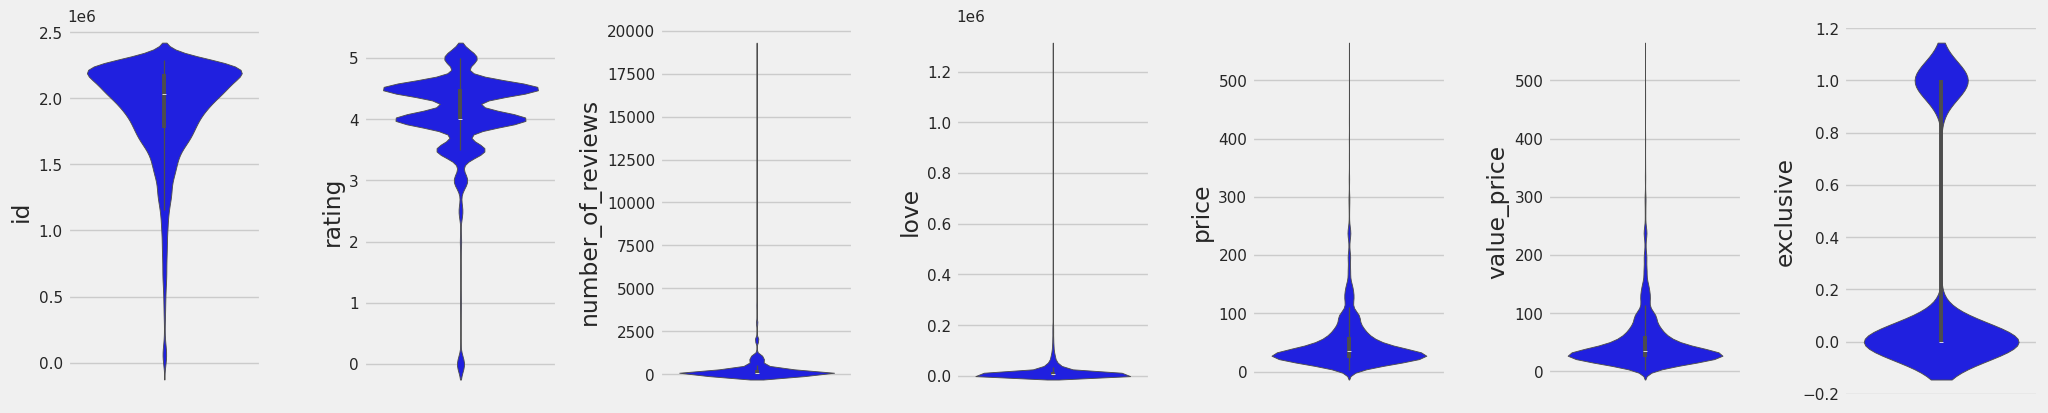

In [ ]:
#violin plot feature numerik
for i in range(0, len(numb)):
    plt.subplot(2, len(numb), i+1)
    sns.violinplot(df[numb[i]], color='blue')
    plt.tight_layout()

**Jawaban Soal 2** <br>
***Data Numerik***
1. Rating : data kebanyakan tersebar pada nilai 4.0 s/d 4.5 dan terdapat outlier pada nilai 0 s/d 3 serta diatribusinya bimodal
2. number_of_reviews : distribusi skew ke kanan (positively skewed) dimana terdapat outlier yang sangat besar terutaman diatas nilai 1000.
3. love : distribusi skew ke kanan (positively skewed) dimana terdapat 1 global outlier yang yang berbeda sendiri yang bernilai diatas 1.2
4. price : distribusi skew ke kanan (positively skewed) dan terdapat outlier
5. value_price : dari bentuk distribusi dan boxplot sagat mirip dengan feature price kemungkinan ada nilai redundan dari price
6. exclusive : distribusi skew ke kanan (positively skewed)
<br><br>

***Follow-Up***<br>
1. Untuk data numerik yang memiliki outlier akan dihapus dengan metode Z-Score/IQR
2. Ubah semua data feature numerik agar memiliki skala yang sama dengan normalisasi/Standarisasi/Log Transform


### 3. Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?<br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

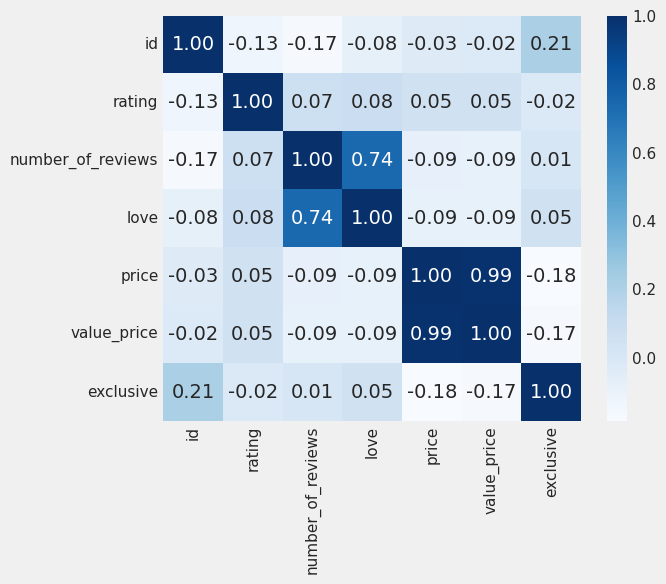

In [ ]:
plt.figure(figsize=(6, 5))

sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

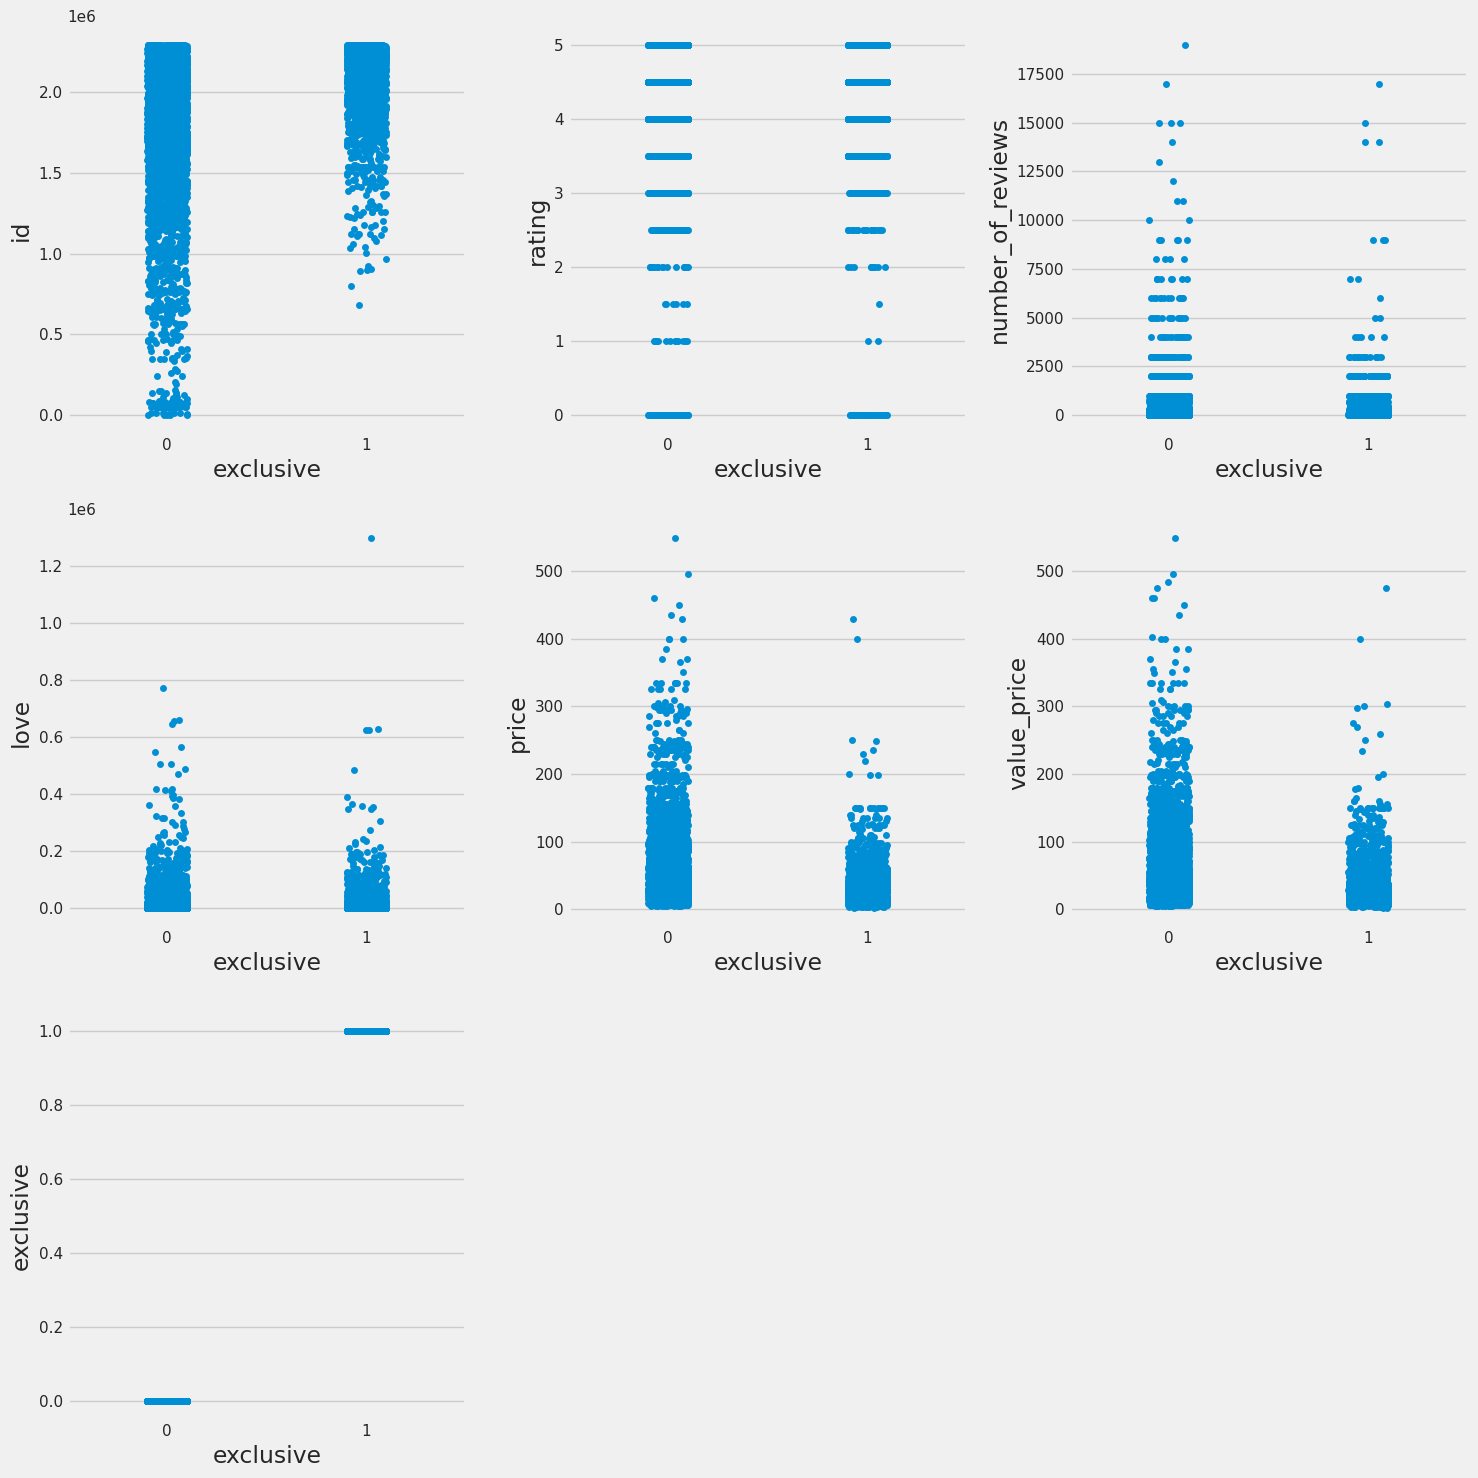

In [ ]:
# korelasi feature brand dan feature numerik
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numb)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='exclusive', y=numb[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**Jawaban Soal 3** <br>

**Pola Fitur yang menarik**<br>
Price dan Value_price memiliki korelasi yang sangat tinggi (0.987777), yang
menunjukkan bahwa keduanya hampir identik atau sangat mirip dalam hal korelasi dengan fitur lainnya. mungkin perlu untuk mempertimbangkan untuk menggunakan hanya salah<br>
satu dari kedua fitur ini dalam analisis lebih lanjut.
Love memiliki korelasi yang cukup tinggi dengan Number_of_reviews (0.744099),
menunjukkan bahwa produk dengan tingkat kepuasan yang tinggi cenderung memiliki lebih
banyak ulasan. Pola ini bisa dijelaskan dengan asumsi bahwa produk yang disukai
cenderung menarik lebih banyak perhatian dan ulasan dari konsumen.

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? <br>


B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?<br>


1. korelasi love dan number_of_reviews berkolelasi kuat 0.74 karena semakin banyak orang yang reviews semakin banyak juga lovenya.
2. korelasi price dan value_price berkolelasi sangat kuat 0.99 besar kemungkinan terdapat redundan dan dilihat dari distribusi juga hasilnya hampir sama.
3. Selebihnya tidak ada korelasi anatar feature lainnya

# 4. Data Cleansing

## A. Missing Value

In [ ]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
def info_missing_value(data):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum() / len(data) * 100).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  missing_data = missing_data[missing_data['Total'] > 0]
  return missing_data

data = info_missing_value(df)
data

,Total,Percent
rating,95,1.1875
love,34,0.4250
value_price,17,0.2125
category,13,0.1625
number_of_reviews,9,0.1125
price,8,0.1000


In [ ]:
#Missing Value tidak tampil = sudah terhapus
df = df.dropna(subset=['rating', 'love', 'value_price', 'category', 'number_of_reviews', 'price'])
data = info_missing_value(df)
data

,Total,Percent


Ditemukan missing value pada feature 'rating', 'love', 'value_price', 'category',
'number_of_reviews', 'price' namun jumlah nya tidak signifikan dengan persentase di bawah
10% dari total record sehingga kami menggunakan teknik penghapusan

## B. Duplicate Values


In [ ]:
# Declare Function
def check_duplicate(data):
  if data.duplicated(subset=data.columns.difference(['id'])).sum() > 0:
      print("Ditemukan data duplicate sebesar:", data.duplicated(subset=data.columns.difference(['id'])).sum())
  else:
      print("Tidak ditemukan data duplicate")

# Run Function
check_duplicate(df)

Ditemukan data duplicate sebesar: 6


In [ ]:
#Remove Duplicate
df.drop_duplicates(subset=df.columns.difference(['id']), inplace=True)
#Check Ulang
check_duplicate(df)

Tidak ditemukan data duplicate


## C. Handle Outliers

In [ ]:
# Metode IQR
# Define Function " Dettect Outlier"
def detect_outliers(dataset, threshold=1.5):
  outlier_info = {}
  feature_list = []
  upper_bound_list = []
  lower_bound_list = []

  for column in dataset.columns:
    values = dataset[column]
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = values[(values < lower_bound) | (values > upper_bound)]
    feature_list.append(column)
    upper_bound_list.append(upper_bound)
    lower_bound_list.append(lower_bound)

    outlier_info[column] = {
      'Lower Bound': lower_bound,
      'Upper Bound': upper_bound,
      # 'Outliers': outliers.tolist()
}
  return {'standart' : outlier_info, 'dataframe' : pd.DataFrame({'feature' : feature_list})}

def remove_outliers(dataset, outlier_info):
  cleaned_dataset = dataset.copy()
  for feature, info in outlier_info.items():
      lower_bound = info['Lower Bound']
      upper_bound = info['Upper Bound']

      cleaned_dataset = cleaned_dataset[(cleaned_dataset[feature] >= lower_bound)]
  return cleaned_dataset

In [ ]:
outlier_info = detect_outliers(df[numb])
outlier_info['standart']

{'id': {'Lower Bound': 1188928.125, 'Upper Bound': 2785289.125},
 'rating': {'Lower Bound': 3.25, 'Upper Bound': 5.25},
 'number_of_reviews': {'Lower Bound': -308.5, 'Upper Bound': 551.5},
 'love': {'Lower Bound': -17950.0, 'Upper Bound': 35250.0},
 'price': {'Lower Bound': -27.0, 'Upper Bound': 109.0},
 'value_price': {'Lower Bound': -30.0, 'Upper Bound': 114.0},
 'exclusive': {'Lower Bound': -1.5, 'Upper Bound': 2.5}}

In [ ]:
# Analis Distribusi Data dengan KDE Plot
def print_kde(selected_dataset, features):
  for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) # 2x4=8> len(numericals)=7
    sns.kdeplot(x=selected_dataset[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

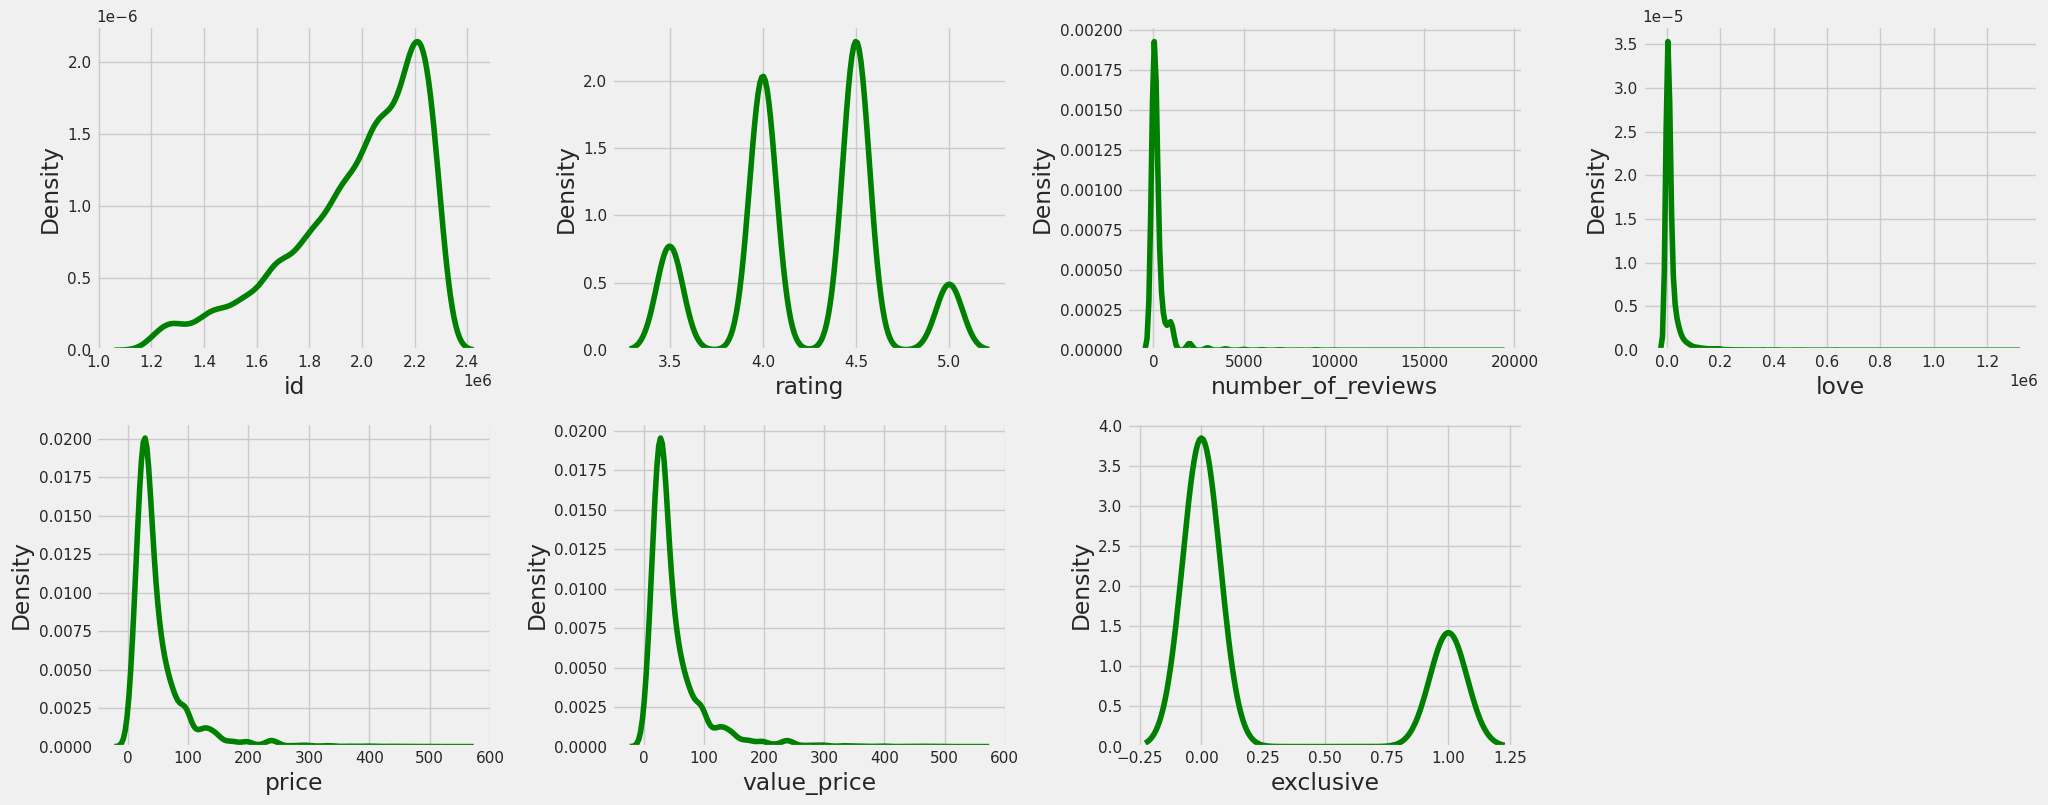

In [ ]:
dataset_iqr = remove_outliers(df, outlier_info['standart'])
print_kde(dataset_iqr,numb)

In [ ]:
print("Total dataset setelah dihapus dengan metode IQR", len(dataset_iqr))

Total dataset setelah dihapus dengan metode IQR 6896


## D. Feature transformation


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

label_encoder                     = LabelEncoder()
df['brand_num']                   = label_encoder.fit_transform(df['brand'])
df['category_num']                = label_encoder.fit_transform(df['category'])
features_to_scale                 = ['rating', 'love', 'price', 'value_price', 'number_of_reviews','brand_num', 'category_num']
scaler                            = MinMaxScaler()
df[features_to_scale]             = scaler.fit_transform(df[features_to_scale])
df

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,brand_num,harga_pca,category_num
0,50,0.728155,other,1.0,0.002421,0.000000,0.087751,0.087751,0,0.728155,-0.000980,1.000000
1,304,0.728155,other,0.0,0.000000,0.000000,0.087751,0.087751,0,0.728155,-0.000980,1.000000
5,6528,0.320388,Perfume,0.9,0.004947,0.002308,0.138940,0.138940,0,0.320388,0.071401,0.813953
6,7393,0.064725,Cologne,1.0,0.001632,0.002538,0.168190,0.168190,0,0.064725,0.112761,0.093023
7,7740,0.928803,Perfume,0.9,0.008632,0.003231,0.109689,0.109689,0,0.928803,0.030040,0.813953
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2293207,0.873786,other,0.0,0.000000,0.000149,0.151737,0.151737,0,0.873786,0.089496,1.000000
7996,2293439,0.818770,Lipstick,0.8,0.001579,0.009538,0.096892,0.096892,0,0.818770,0.011945,0.651163
7997,2293488,0.284790,other,0.9,0.001158,0.009923,0.049360,0.058501,1,0.284790,-0.048690,1.000000
7998,2293793,0.996764,Mascara,0.9,0.000263,0.001846,0.018282,0.018282,0,0.996764,-0.099210,0.720930


## E. Feature encoding

In [ ]:

# Menghitung jumlah kemunculan setiap kategori
counts = df['category'].value_counts()

# Daftar kategori
kategori_other = counts[counts < 51].index

# Mengganti kategori-kategori tersebut dengan label 'other'
df['category'] = df['category'].apply(lambda x: 'other' if x in kategori_other else x)

df['category'].value_counts()

other                        1819
Perfume                       592
Moisturizers                  391
Face Serums                   334
Value & Gift Sets             240
Face Wash & Cleansers         218
Face Masks                    211
Rollerballs & Travel Size     209
Hair Styling Products         205
Face Brushes                  175
Eye Palettes                  170
Eye Creams & Treatments       167
Shampoo                       162
Lipstick                      161
Highlighter                   152
Foundation                    151
Cologne                       137
Mascara                       133
Conditioner                   129
Candles & Home Scents         122
Face Primer                   120
Eyeliner                      105
Makeup                        103
Setting Spray & Powder        101
Mini Size                      95
Eye Brushes                    93
Beauty Supplements             92
Body Lotions & Body Oils       91
Eyebrow                        89
Lotions & Oils

In [ ]:
onehot_category = pd.get_dummies(df['category'],  prefix='category')

In [ ]:
# join category yang sudah di encoding
df_encoding = df.join(onehot_category,how='outer', lsuffix='right')

In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7822 entries, 0 to 7999
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  7822 non-null   int64  
 1   brand                               7822 non-null   float64
 2   category                            7822 non-null   object 
 3   rating                              7822 non-null   float64
 4   number_of_reviews                   7822 non-null   float64
 5   love                                7822 non-null   float64
 6   price                               7822 non-null   float64
 7   value_price                         7822 non-null   float64
 8   exclusive                           7822 non-null   int64  
 9   brand_num                           7822 non-null   float64
 10  harga_pca                           7822 non-null   float64
 11  category_num                        7822 no

## F. Class imbalance

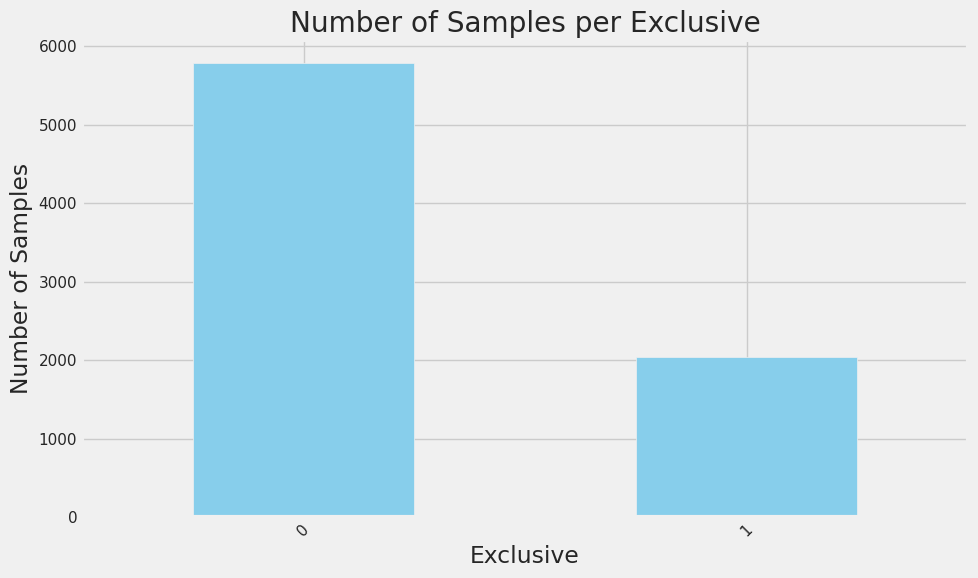

In [ ]:
# Profile Imbalance pada Label
class_counts = df['exclusive'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Exclusive')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Exclusive')
plt.xticks(rotation=45)  # Rotasi label kategori agar lebih mudah dibaca
plt.tight_layout()
plt.show()

**Metode SMOTE**

In [ ]:
def print_imbalanced_plot(X_resampled, y_resampled, method):
  # Hitung jumlah data pada setiap kelas sebelum dan setelah resampling
  class_counts_before = [len(y_train[y_train == i]) for i in np.unique(y_train)]
  class_counts_after = [len(y_resampled[y_resampled == i]) for i in np.unique(y_resampled)]

  # Labels untuk kelas
  class_labels = np.unique(y_train)

  # Membuat plot
  plt.figure(figsize=(10, 5))
  plt.bar(class_labels - 0.2, class_counts_before, width=0.4, align='center', label='Sebelum Resampling')
  plt.bar(class_labels + 0.2, class_counts_after, width=0.4, align='center', label='Setelah Resampling')
  plt.xlabel('Kelas')
  plt.ylabel('Jumlah Data')
  plt.title('Resampling dengan '+method,)
  plt.legend()
  plt.show()

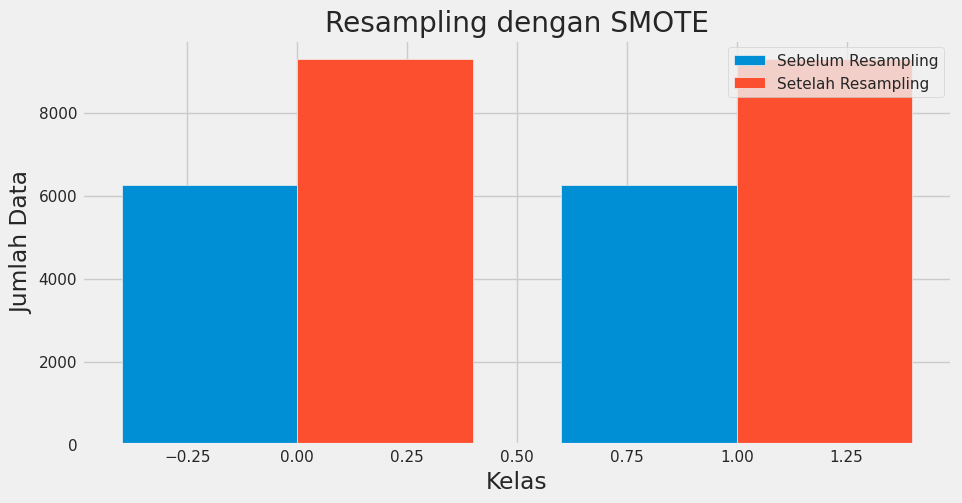

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler,EditedNearestNeighbours, TomekLinks
from sklearn.model_selection import train_test_split

X = df[['rating','number_of_reviews','love','price','value_price','brand_num', 'category_num']]
y = df[['exclusive']]

# Lakukan train-test split dan jangan pernah melakukan smote pada data testing karena dapat membuat model BIAS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE')


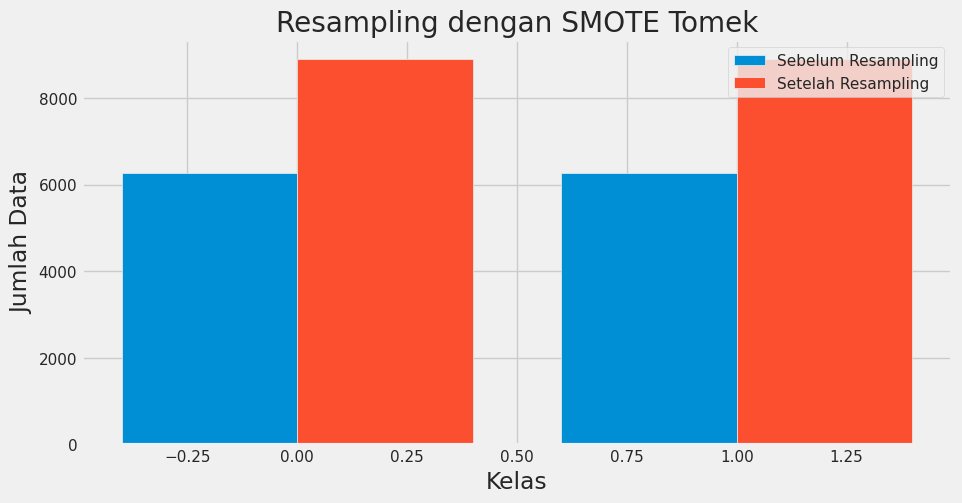

In [ ]:
#SMOTE TOMEK
smote = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE Tomek')

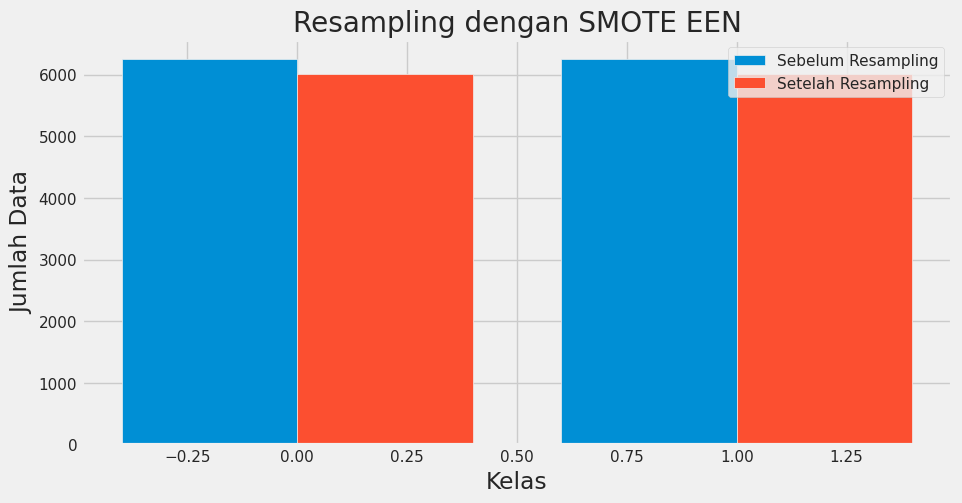

In [ ]:
#SMOTE EEN
smote = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print_imbalanced_plot(X_resampled, y_resampled, 'SMOTE EEN')

#5A FEATURE SELECTION

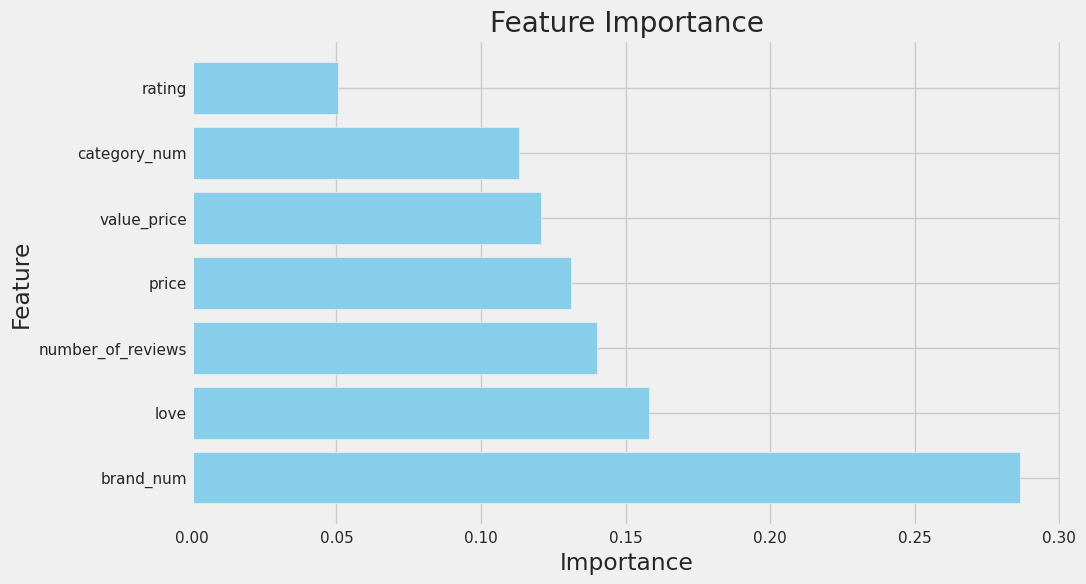

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest
rf_model = RandomForestClassifier()
X
# Latih model pada data latih
rf_model.fit(X, y)
# Dapatkan feature importance
feature_importance = rf_model.feature_importances_
# Simpan hasil feature importance ke dalam DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# Urutkan berdasarkan nilai importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Visualisasikan feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#FEATURE EXTRACTION

In [ ]:
df

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,brand_num,harga_pca,category_num
0,50,0.728155,other,1.0,0.002421,0.000000,0.087751,0.087751,0,0.728155,-0.000980,1.000000
1,304,0.728155,other,0.0,0.000000,0.000000,0.087751,0.087751,0,0.728155,-0.000980,1.000000
5,6528,0.320388,Perfume,0.9,0.004947,0.002308,0.138940,0.138940,0,0.320388,0.071401,0.813953
6,7393,0.064725,Cologne,1.0,0.001632,0.002538,0.168190,0.168190,0,0.064725,0.112761,0.093023
7,7740,0.928803,Perfume,0.9,0.008632,0.003231,0.109689,0.109689,0,0.928803,0.030040,0.813953
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2293207,0.873786,other,0.0,0.000000,0.000149,0.151737,0.151737,0,0.873786,0.089496,1.000000
7996,2293439,0.818770,Lipstick,0.8,0.001579,0.009538,0.096892,0.096892,0,0.818770,0.011945,0.651163
7997,2293488,0.284790,other,0.9,0.001158,0.009923,0.049360,0.058501,1,0.284790,-0.048690,1.000000
7998,2293793,0.996764,Mascara,0.9,0.000263,0.001846,0.018282,0.018282,0,0.996764,-0.099210,0.720930


In [ ]:
#Dengan menggunakan Dimensional Reduction (PCA) akan menciptakan feature baru yaitu "Harga"
from sklearn.decomposition import PCA
dataset_labeled_pca = df
X = df[['price', 'value_price']]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
dataset_labeled_pca['harga_pca'] = X_pca

dataset_labeled_pca = dataset_labeled_pca[['rating','number_of_reviews','love','exclusive','harga_pca','price', 'value_price', 'brand']]
dataset_labeled_pca

,rating,number_of_reviews,love,exclusive,harga_pca,price,value_price,brand
0,1.0,0.002421,0.000000,0,-0.000980,0.087751,0.087751,0.728155
1,0.0,0.000000,0.000000,0,-0.000980,0.087751,0.087751,0.728155
5,0.9,0.004947,0.002308,0,0.071401,0.138940,0.138940,0.320388
6,1.0,0.001632,0.002538,0,0.112761,0.168190,0.168190,0.064725
7,0.9,0.008632,0.003231,0,0.030040,0.109689,0.109689,0.928803
...,...,...,...,...,...,...,...,...
7995,0.0,0.000000,0.000149,0,0.089496,0.151737,0.151737,0.873786
7996,0.8,0.001579,0.009538,0,0.011945,0.096892,0.096892,0.818770
7997,0.9,0.001158,0.009923,1,-0.048690,0.049360,0.058501,0.284790
7998,0.9,0.000263,0.001846,0,-0.099210,0.018282,0.018282,0.996764


#PENGUJIAN DENGAN MACHINE LEARNING MODEL

In [ ]:
feature =  dataset_labeled_pca[['rating','number_of_reviews','love','value_price','brand']]
label = dataset_labeled_pca[['exclusive']]

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3,random_state=0)

undersampler = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#RF
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)


# SVM
svm_model = SVC(random_state=0)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_model.predict(X_test)

# DT
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_model.predict(X_test)

# Output classification report untuk RF
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

# Output classification report untuk SVM
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

# Output classification report untuk DF
print("Classification Report for DT:")
print(classification_report(y_test, dt_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1763
           1       0.62      0.70      0.66       584

    accuracy                           0.82      2347
   macro avg       0.76      0.78      0.77      2347
weighted avg       0.83      0.82      0.82      2347

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.52      0.65      1763
           1       0.35      0.78      0.48       584

    accuracy                           0.58      2347
   macro avg       0.61      0.65      0.57      2347
weighted avg       0.75      0.58      0.61      2347

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1763
           1       0.61      0.73      0.67       584

    accuracy                           0.82      2347
   macro avg       0.76   

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?